In [1]:
# pip install pandas-datareader
# pip install plotly
# pip install openai
# pip install os-sys
# pip install mplfinance
# pip install langchain

In [2]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import plotly.graph_objects as go
import mplfinance as mpf

In [3]:
os.environ["IEX_API_KEY"] = "pk_01060032d28c406c957ded834f0ce4a3"

In [4]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2017, 12, 31)

df = web.DataReader("TSLA", "iex", start, end)

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=TSLA&types=chart&range=max&token=pk_01060032d28c406c957ded834f0ce4a3

In [5]:
df.head()

,open,high,low,close,volume
date,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0


In [6]:
df.to_csv("tsla.csv")

In [7]:
df = pd.read_csv("tsla.csv",parse_dates=True, index_col=0)
df.head()

,open,high,low,close,volume
date,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0


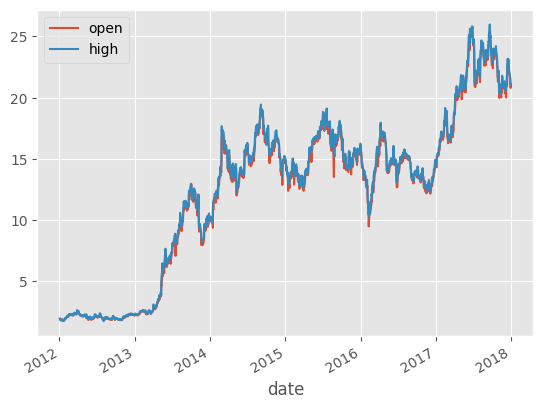

In [8]:
style.use('ggplot')
df[['open','high']].plot()
plt.show()

In [9]:
df['100ma'] = df['close'].rolling(window = 100, min_periods = 0).mean() #Moving Average with a sliding window of 100. min_periods is used for first 100 days so that it doesn't produce NaN.

In [10]:
df.head()

,open,high,low,close,volume,100ma
date,,,,,,
2012-01-03,1.9293,1.9667,1.8433,1.8720,13920780.0,1.872000
2012-01-04,1.8807,1.9113,1.8333,1.8473,9450540.0,1.859650
2012-01-05,1.8507,1.8620,1.7900,1.8080,15081480.0,1.842433
2012-01-06,1.8133,1.8527,1.7607,1.7940,14794305.0,1.830325
2012-01-09,1.8000,1.8327,1.7413,1.8167,13454265.0,1.827600


In [11]:
df.tail()

,open,high,low,close,volume,100ma
date,,,,,,
2017-12-22,21.9673,22.0614,21.6547,21.6800,63237105.0,22.586698
2017-12-26,21.5887,21.5960,21.1053,21.1527,65676195.0,22.566832
2017-12-27,21.0667,21.1787,20.7167,20.7760,70681665.0,22.536652
2017-12-28,20.7833,21.0547,20.6360,21.0240,64745205.0,22.510112
2017-12-29,21.0787,21.0940,20.6667,20.7567,56657325.0,22.474199


In [12]:
df_new = df['close'].resample('10D').ohlc() #Resampling the data of 10 days
df_volume = df['volume'].resample('10D').sum() #Resampling the data of 10 days for volume

In [13]:
df_new.head()

,open,high,low,close
date,,,,
2012-01-03,1.8720,1.8833,1.7940,1.8833
2012-01-13,1.5193,1.7873,1.5193,1.7733
2012-01-23,1.7847,1.9720,1.7847,1.9720
2012-02-02,2.0167,2.1720,2.0167,2.0733
2012-02-12,2.0993,2.3313,2.0993,2.3000


In [14]:
df_volume.head()

date
2012-01-03     97800435.0
2012-01-13    199912785.0
2012-01-23     94377135.0
2012-02-02    105291375.0
2012-02-12    156986520.0
Freq: 10D, Name: volume, dtype: float64

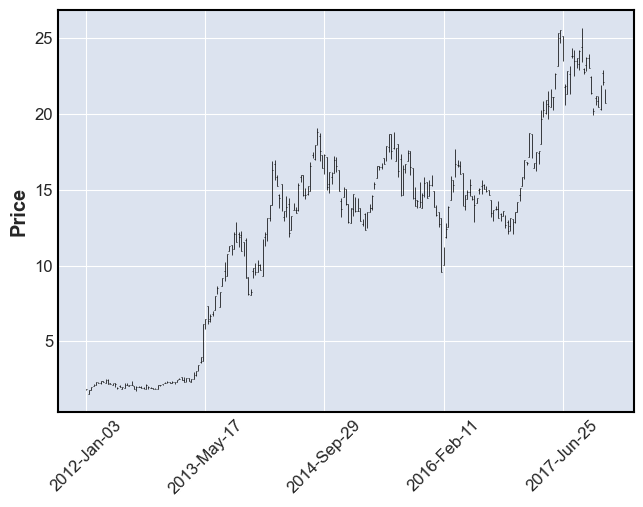

In [15]:
mpf.plot(df_new)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


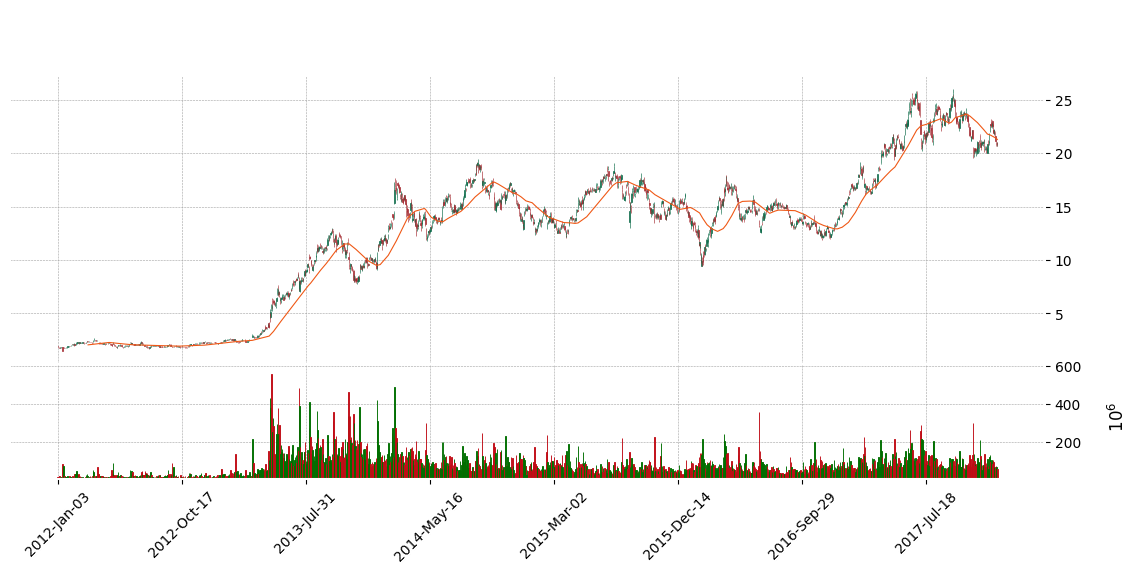

In [16]:
mpf.plot(df, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True
            )

In [17]:
df.reset_index(inplace = True)

In [18]:
hovertext=[]
for i in range(len(df['open'])):
    hovertext.append('Open: '+str(df['open'][i])+'<br>Close: '+str(df['close'][i]))  #Used for displaying the open and close price when the user hovers on the data.

In [19]:
fig = go.Figure(data=go.Ohlc(x=df['date'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'],
                    text=hovertext,
                    hoverinfo='text'))
fig.show()